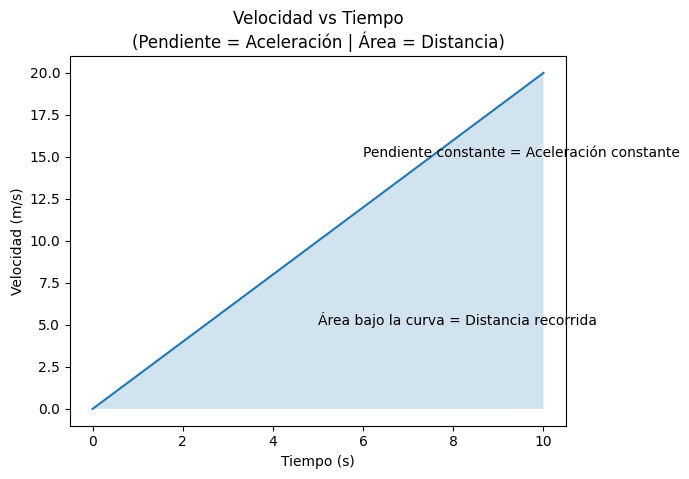

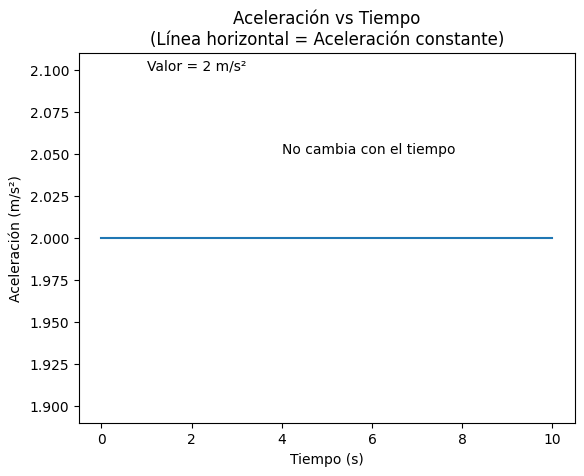

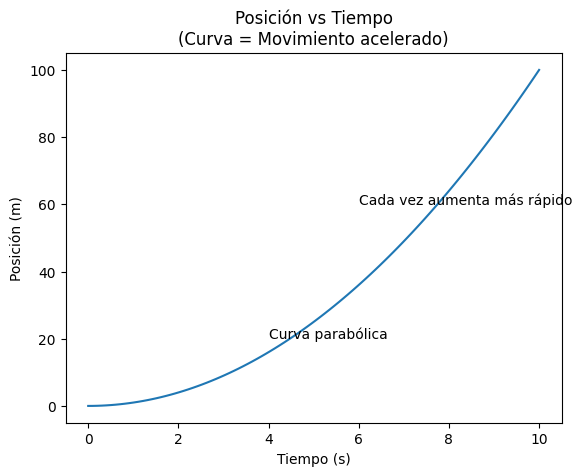

In [2]:
# Gráficos más explicativos sobre velocidad y aceleración
import numpy as np
import matplotlib.pyplot as plt

# Tiempo
t = np.linspace(0, 10, 100)

# Movimiento con aceleración constante
a = 2  # m/s²
v = a * t
x = 0.5 * a * t**2  # posición

# -----------------------------
# 1) VELOCIDAD vs TIEMPO
# -----------------------------
plt.figure()
plt.plot(t, v)
plt.fill_between(t, v, alpha=0.2)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad vs Tiempo\n(Pendiente = Aceleración | Área = Distancia)")

plt.text(5, 5, "Área bajo la curva = Distancia recorrida")
plt.text(6, 15, "Pendiente constante = Aceleración constante")

plt.show()


# -----------------------------
# 2) ACELERACIÓN vs TIEMPO
# -----------------------------
plt.figure()
plt.plot(t, np.full_like(t, a))
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración (m/s²)")
plt.title("Aceleración vs Tiempo\n(Línea horizontal = Aceleración constante)")

plt.text(4, 2.05, "No cambia con el tiempo")
plt.text(1, 2.1, "Valor = 2 m/s²")

plt.show()


# -----------------------------
# 3) POSICIÓN vs TIEMPO
# -----------------------------
plt.figure()
plt.plot(t, x)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Posición vs Tiempo\n(Curva = Movimiento acelerado)")

plt.text(4, 20, "Curva parabólica")
plt.text(6, 60, "Cada vez aumenta más rápido")

plt.show()
